# Importing data

In [90]:
import pandas as pd

In [91]:
excel_file = 'cc2_case.xlsx'

# Read the Excel file
df = pd.read_excel(excel_file)

# Save it as a CSV file
df.to_csv('cc2_case.csv', index=False)

sales = pd.read_csv('cc2_case.csv')

sales.head()

,y,y2,x1,x2,x3,x4,x5,x6,x7,x8,...,x15,x16,x17,x10,x11,x12,store_id,sku_id,cubic_in,price
0,1,2,N,7,9,3,5,9370,7374,2.742857,...,0,0,1900.0,0.0,0,0.0,1,1099,1.127207,15.29
1,1,1,N,0,1,0,0,404,582,2.000000,...,0,0,1900.0,0.0,0,0.0,1,1044,1.905655,13.84
2,0,0,N,0,1,0,0,136,165,0.285714,...,0,0,1900.0,0.0,0,0.0,1,1066,19.875012,13.32
3,1,5,N,1,5,0,2,709,837,3.314286,...,0,0,1900.0,0.0,0,0.0,1,1178,7.458120,12.61
4,1,1,N,5,3,0,2,10403,8664,6.200000,...,0,0,1900.0,0.0,0,0.0,1,1141,5.403144,10.52


### Uploading to AWS S3

In [92]:
import boto3

# Initialize a session using Amazon S3
s3 = boto3.client('s3')

# Upload files to S3 bucket
bucket_name = 'productstock'

s3.upload_file('cc2_case.csv', bucket_name, 'cc2_case.csv')

In [93]:
# Filter rows where store_id is 71
sales_71 = sales[sales['store_id'] == 71]

In [94]:
sales_71.shape

(109, 23)

In [95]:
sales_71.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 4748 to 4856
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   y         109 non-null    int64  
 1   y2        109 non-null    int64  
 2   x1        109 non-null    object 
 3   x2        109 non-null    int64  
 4   x3        109 non-null    int64  
 5   x4        109 non-null    int64  
 6   x5        109 non-null    int64  
 7   x6        109 non-null    int64  
 8   x7        109 non-null    int64  
 9   x8        109 non-null    float64
 10  x9        109 non-null    float64
 11  x13       109 non-null    float64
 12  x14       109 non-null    float64
 13  x15       109 non-null    int64  
 14  x16       109 non-null    int64  
 15  x17       109 non-null    float64
 16  x10       109 non-null    float64
 17  x11       109 non-null    int64  
 18  x12       109 non-null    float64
 19  store_id  109 non-null    int64  
 20  sku_id    109 non-null    int64  

In [96]:
sales_71['x1'].value_counts()

x1
Y    67
N    42
Name: count, dtype: int64

In [97]:
x1_mapper = {"Y": 1,
              "N": 0}

In [98]:
sales_71['x1_1'] = sales_71["x1"].replace(x1_mapper)

/tmp/ipykernel_7625/4252821787.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sales_71['x1_1'] = sales_71["x1"].replace(x1_mapper)
/tmp/ipykernel_7625/4252821787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_71['x1_1'] = sales_71["x1"].replace(x1_mapper)


In [99]:
sales_71.head()

,y,y2,x1,x2,x3,x4,x5,x6,x7,x8,...,x16,x17,x10,x11,x12,store_id,sku_id,cubic_in,price,x1_1
4748,0,0,N,0,0,0,0,234,280,1.190476,...,0,1900.0,0.0,0,0.0,71,1038,4.414295,20.79,0
4749,1,1,N,14,12,0,0,5693,2138,12.444444,...,0,1900.0,0.0,0,0.0,71,1169,2.605841,12.25,0
4750,1,3,N,2,3,0,0,4095,2308,1.714286,...,0,1900.0,0.0,0,0.0,71,1083,3.538905,5.12,0
4751,0,0,N,0,0,0,0,232,200,0.984127,...,0,1900.0,0.0,0,0.0,71,1051,26.316455,9.09,0
4752,0,0,N,1,1,0,0,794,800,5.428571,...,0,1900.0,0.0,0,0.0,71,1182,3.143626,7.08,0


In [100]:
sales_71.describe()

,y,y2,x2,x3,x4,x5,x6,x7,x8,x9,...,x16,x17,x10,x11,x12,store_id,sku_id,cubic_in,price,x1_1
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.0,109.000000,109.000000,109.000000,109.000000,...,109.000000,109.000000,109.000000,109.000000,109.000000,109.0,109.000000,109.000000,109.000000,109.000000
mean,0.522936,1.541284,3.064220,2.385321,0.110092,0.0,1906.908257,1753.550459,5.028542,2.385321,...,0.119266,1959.443903,38.743729,85.247706,128.213655,71.0,1103.449541,6.552477,10.915688,0.614679
std,0.501781,2.576720,4.728314,3.563987,0.478025,0.0,2396.898059,2127.874511,6.337086,3.563987,...,1.245174,47.683335,57.213202,132.165101,189.334220,0.0,58.135137,7.565196,4.712802,0.488919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,29.000000,25.000000,0.047619,0.000000,...,0.000000,1900.000000,0.000000,0.000000,0.000000,71.0,1001.000000,0.054155,0.950000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,232.000000,230.000000,0.666667,0.000000,...,0.000000,1900.000000,0.000000,0.000000,0.000000,71.0,1051.000000,1.539096,7.530000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,822.000000,858.000000,2.158730,1.000000,...,0.000000,1988.307107,5.754554,8.000000,19.043403,71.0,1107.000000,4.414295,11.110000,1.000000
75%,1.000000,2.000000,5.000000,3.000000,0.000000,0.0,2751.000000,2464.000000,7.460317,3.000000,...,0.000000,2000.438616,50.454574,107.000000,166.968059,71.0,1156.000000,8.179046,13.740000,1.000000
max,1.000000,17.000000,23.000000,23.000000,3.000000,0.0,10439.000000,10117.000000,31.222222,23.000000,...,13.000000,2011.482759,210.130013,513.000000,695.377998,71.0,1194.000000,39.396703,24.890000,1.000000


In [101]:
sales_71['y'].value_counts()

y
1    57
0    52
Name: count, dtype: int64

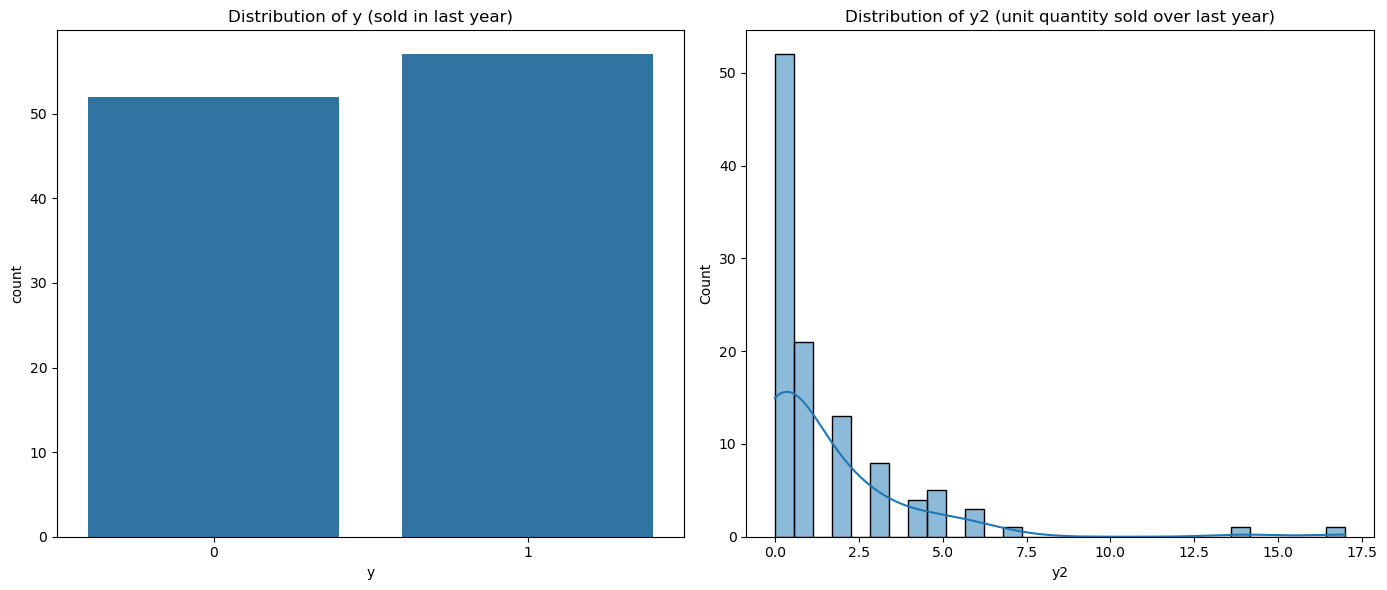

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variables 'y' and 'y2'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='y', data=sales_71)
plt.title('Distribution of y (sold in last year)')

plt.subplot(1, 2, 2)
sns.histplot(sales_71['y2'], bins=30, kde=True)
plt.title('Distribution of y2 (unit quantity sold over last year)')

plt.tight_layout()
plt.show()

In [103]:
sales_71.to_csv("71_cases_n.csv")

In [104]:
# Upload files to S3 bucket
bucket_name = 'productstock'

s3.upload_file('71_cases_n.csv', bucket_name, '71_cases_n.csv')

In [105]:
sales_71 = sales_71.drop(columns = "x1")

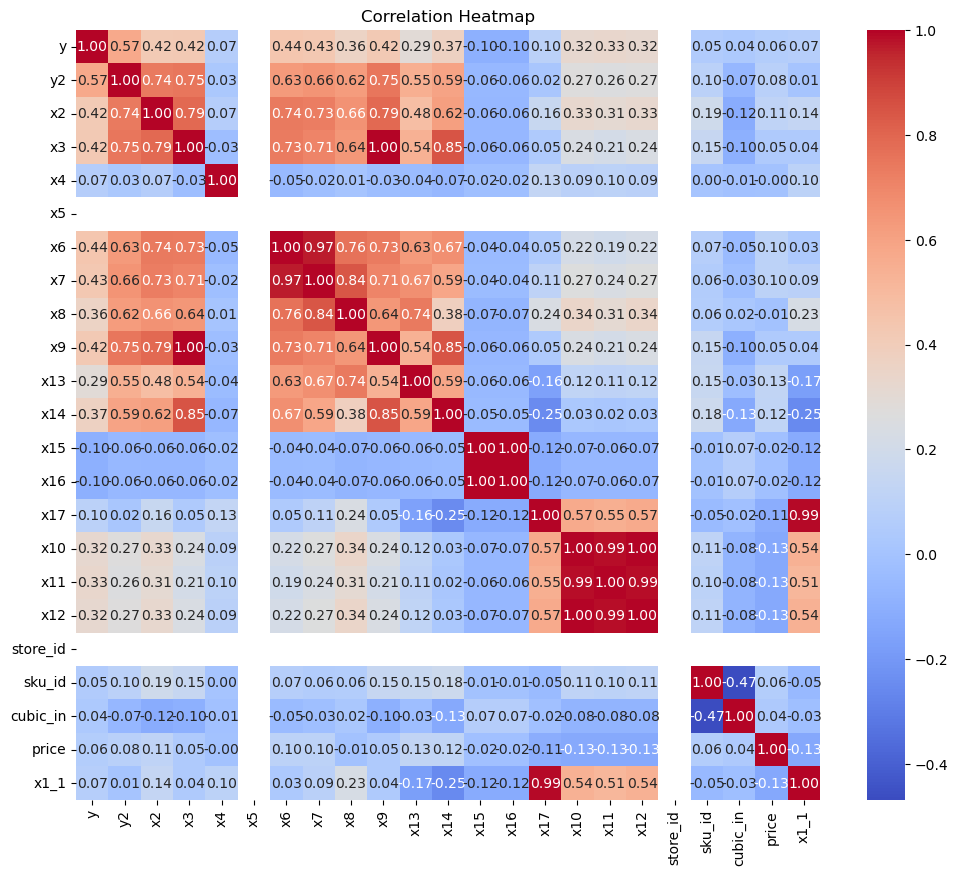

In [106]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = sales_71.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# predictive model

### predict for y (selling or not)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define the independent variables and the dependent variable
independent_vars = ['x1_1'] + ['x' + str(i) for i in range(2, 18)] 
dependent_var = 'y'

# Extract the features (X) and target (y)
X = sales_71[independent_vars]
y = sales_71[dependent_var]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Logistic Regression model with increased max_iter
logistic_model = LogisticRegression(max_iter=2000)

# Set up K-Fold cross-validation with 5 observations per fold
kf = KFold(n_splits=len(X) // 5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(logistic_model, X_scaled, y, cv=kf)

# Fit the model on the entire dataset
logistic_model.fit(X_scaled, y)

y_pred = logistic_model.predict(X_scaled)

# Get the coefficients and the feature names
coef = logistic_model.coef_[0]
feature_names = X.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
})

# Sort the DataFrame by the absolute value of the coefficients
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Print the coefficients
print("Logistic Regression Coefficients with K-Folds:")
print(coef_df)

# Print Cross-validation scores
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Scores:", cv_scores.std())

Logistic Regression Coefficients with K-Folds:
   Feature  Coefficient
5       x6     0.664418
13     x14     0.647452
10     x11     0.547696
1       x2     0.418119
8       x9     0.216732
2       x3     0.216732
0     x1_1    -0.189115
7       x8    -0.184716
14     x15    -0.162762
15     x16    -0.162762
6       x7     0.134760
3       x4     0.078658
9      x10     0.061368
11     x12     0.061368
16     x17    -0.048104
12     x13    -0.014463
4       x5     0.000000
Mean Cross-Validation Score: 0.7507936507936509
Standard Deviation of Cross-Validation Scores: 0.1707806686515907


### predict for y2 (selling quantity)

In [108]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
import pandas as pd

# Define the independent variables and the dependent variable
independent_vars = ['x1_1'] + ['x' + str(i) for i in range(2, 18)] 
dependent_var = 'y2'

# Extract the features (X) and target (y)
X = sales_71[independent_vars]
y = sales_71[dependent_var]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Set up K-Fold cross-validation with 5 observations per fold
kf = KFold(n_splits=len(X) // 5, shuffle=True, random_state=42)

# Define a scoring function using RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation
cv_scores = cross_val_score(linear_model, X_scaled, y, cv=kf, scoring=rmse_scorer)

# Fit the model on the entire dataset
linear_model.fit(X_scaled, y)

# Predict the unit quantity sold
y2_pred = linear_model.predict(X_scaled)

# Get the coefficients and the feature names
coef = linear_model.coef_
feature_names = X.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
})

# Sort the DataFrame by the absolute value of the coefficients
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Print the coefficients
print("Linear Regression Coefficients with K-Folds:")
print(coef_df)

# Print Cross-validation scores
print("Mean RMSE Cross-Validation Score:", cv_scores.mean())
print("Standard Deviation of RMSE Cross-Validation Scores:", cv_scores.std())

Linear Regression Coefficients with K-Folds:
   Feature   Coefficient
9      x10 -1.118504e+08
11     x12  1.118504e+08
2       x3  1.758101e+01
8       x9 -1.574084e+01
4       x5  9.750974e+00
6       x7  1.513996e+00
5       x6 -1.162914e+00
10     x11  9.628328e-01
16     x17 -8.681472e-01
13     x14 -8.662827e-01
1       x2  8.360097e-01
12     x13  5.840018e-01
7       x8 -5.798037e-01
0     x1_1  4.873646e-01
3       x4  5.118402e-02
14     x15 -3.426635e-02
15     x16 -1.662977e-02
Mean RMSE Cross-Validation Score: 1.775014286366317
Standard Deviation of RMSE Cross-Validation Scores: 1.226201156123989


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecat

In [109]:
print(y_pred)

[0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1]


In [110]:
print(np.round(y2_pred).clip(min=0))

[ 0.  5.  1.  0.  1.  2.  5.  6.  2.  0.  1.  1.  2.  4.  1.  1.  2.  0.
  0.  5.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  1.  3.  1. -0.  1.  0.
  6.  0.  0.  1.  5.  0. -0.  3.  0.  1.  1. -0.  0.  1.  0.  1. -0.  1.
  0.  6. -0.  0.  0.  0. -0.  0. -0.  0. -0.  1.  0.  3. -0.  1.  3.  4.
  0.  5.  3.  2.  9.  3.  0.  0.  1.  0.  0.  3.  4.  0.  6.  1.  1.  2.
  0.  3.  4.  2. -0.  2. -0.  4.  2.  1.  1.  1.  0.  3. -0. 13. -0.  3.
  2.]


In [111]:
sales_71['y_pred'] = y_pred
sales_71['y2_pred'] = np.round(y2_pred).clip(min=0)

In [112]:
sales_71.head()

,y,y2,x2,x3,x4,x5,x6,x7,x8,x9,...,x10,x11,x12,store_id,sku_id,cubic_in,price,x1_1,y_pred,y2_pred
4748,0,0,0,0,0,0,234,280,1.190476,0.0,...,0.0,0,0.0,71,1038,4.414295,20.79,0,0,0.0
4749,1,1,14,12,0,0,5693,2138,12.444444,12.0,...,0.0,0,0.0,71,1169,2.605841,12.25,0,1,5.0
4750,1,3,2,3,0,0,4095,2308,1.714286,3.0,...,0.0,0,0.0,71,1083,3.538905,5.12,0,1,1.0
4751,0,0,0,0,0,0,232,200,0.984127,0.0,...,0.0,0,0.0,71,1051,26.316455,9.09,0,0,0.0
4752,0,0,1,1,0,0,794,800,5.428571,1.0,...,0.0,0,0.0,71,1182,3.143626,7.08,0,0,1.0


In [113]:
sales_71.to_csv("71_cases.csv")

In [114]:
# Upload files to S3 bucket
bucket_name = 'productstock'

s3.upload_file('71_cases.csv', bucket_name, '71_cases.csv')

# optimization

In [115]:
#!pip install pyomo

In [116]:
#conda install -c conda-forge glpk

In [117]:
#pip install pulp

In [118]:
# Extract relevant columns
SKUs = sales_71['sku_id'].tolist()
revenue = sales_71.set_index('sku_id')['price'].to_dict()
predicted_demand = sales_71.set_index('sku_id')['y2_pred'].to_dict()
selected_sku = sales_71.set_index('sku_id')['y_pred'].to_dict()
shelf_space = sales_71.set_index('sku_id')['cubic_in'].to_dict()
total_shelf_space = sales_71['cubic_in'].sum() * 0.65
max_quantity = 100  # Example maximum quantity, adjust if needed

### Model with pulp package

In [119]:
from pulp import *

# Define the problem
prob = LpProblem("Optimal_Assortment", LpMaximize)

# Define decision variables
x = LpVariable.dicts("select", SKUs, 0, 1, LpBinary)
q = LpVariable.dicts("quantity", SKUs, 0, None, LpContinuous)

# Define the objective function
prob += lpSum([revenue[i] * q[i] for i in SKUs]), "Total_Revenue"

# Define the shelf space constraint
prob += lpSum([shelf_space[i] * q[i] for i in SKUs]) <= total_shelf_space, "Shelf_Space_Constraint"

# Define the selection and prediction constraints
for i in SKUs:
    prob += q[i] <= max_quantity * x[i], f"Selection_Constraint_{i}"
    prob += x[i] == selected_sku[i], f"Prediction_Constraint_{i}"  # Ensure consistency with y_pred
    prob += q[i] <= predicted_demand[i], f"Predicted_Quantity_Constraint_{i}"  # Ensure q[i] <= y2_pred

# Solve the problem
solver = getSolver('GLPK_CMD')
results = prob.solve(solver)

# Print the results
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Total Revenue = ", value(prob.objective))

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --cpxlp /tmp/8d40827d1a734e55aa40bf435e955be6-pulp.lp -o /tmp/8d40827d1a734e55aa40bf435e955be6-pulp.sol
Reading problem data from '/tmp/8d40827d1a734e55aa40bf435e955be6-pulp.lp'...
328 rows, 218 columns, 545 non-zeros
109 integer variables, all of which are binary
530 lines were read
GLPK Integer Optimizer 5.0
328 rows, 218 columns, 545 non-zeros
109 integer variables, all of which are binary
Preprocessing...
1 row, 45 columns, 45 non-zeros
0 integer variables, none of which are binary
Scaling...
 A: min|aij| =  5.416e-02  max|aij| =  3.940e+01  ratio =  7.275e+02
GM: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
EQ: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
2N: min|aij| =  6.754e-01  max|aij| =  1.303e+00  ratio =  1.929e+00
Constructing initial basis...
Size of triangular part is 1
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
1 row, 45 columns, 45 non-zeros
*  

### model with pyomo package to varify the result

In [132]:
from pyomo.environ import *

# Create a Pyomo model
model = ConcreteModel()

# Define sets
model.SKUs = Set(initialize=SKUs)

# Define parameters
model.revenue = Param(model.SKUs, initialize=revenue)
model.predicted_demand = Param(model.SKUs, initialize=predicted_demand)
model.selected_sku = Param(model.SKUs, initialize=selected_sku)
model.shelf_space = Param(model.SKUs, initialize=shelf_space)
model.total_shelf_space = Param(initialize=total_shelf_space)

# Define decision variables
model.x = Var(model.SKUs, within=Binary)
model.q = Var(model.SKUs, within=NonNegativeReals)

# Define the objective function
def objective_rule(model):
    return sum(model.revenue[i] * model.q[i] for i in model.SKUs)
model.objective = Objective(rule=objective_rule, sense=maximize)

# Define the shelf space constraint
def shelf_space_constraint_rule(model):
    return sum(model.shelf_space[i] * model.q[i] for i in model.SKUs) <= model.total_shelf_space
model.shelf_space_constraint = Constraint(rule=shelf_space_constraint_rule)

# Define the selection constraints
def selection_constraint_rule(model, i):
    return model.q[i] <= model.predicted_demand[i] * model.x[i]
model.selection_constraint = Constraint(model.SKUs, rule=selection_constraint_rule)

# Define the prediction constraints
def prediction_constraint_rule(model, i):
    return model.x[i] == model.selected_sku[i]
model.prediction_constraint = Constraint(model.SKUs, rule=prediction_constraint_rule)

# Define the quantity constraints
def quantity_constraint_rule(model, i):
    return model.q[i] <= model.predicted_demand[i]
model.quantity_constraint = Constraint(model.SKUs, rule=quantity_constraint_rule)

# Solve the model
solver = SolverFactory('glpk')
results = solver.solve(model, tee=True)

# Print the results
result=[]
for i in model.SKUs:
    sku_data = {
        'SKU': f'sku{i}',
        'Selected': model.x[i].value,
        'Quantity': model.q[i].value
    }
    result.append(sku_data)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmp9l2vyn5r.glpk.raw --wglp /tmp/tmpt0hav0h9.glpk.glp --cpxlp
 /tmp/tmpa7x15icg.pyomo.lp
Reading problem data from '/tmp/tmpa7x15icg.pyomo.lp'...
/tmp/tmpa7x15icg.pyomo.lp:1819: warning: lower bound of variable 'x284' redefined
/tmp/tmpa7x15icg.pyomo.lp:1819: warning: upper bound of variable 'x284' redefined
328 rows, 218 columns, 498 non-zeros
109 integer variables, all of which are binary
1928 lines were read
Writing problem data to '/tmp/tmpt0hav0h9.glpk.glp'...
1533 lines were written
GLPK Integer Optimizer 5.0
328 rows, 218 columns, 498 non-zeros
109 integer variables, all of which are binary
Preprocessing...
1 row, 45 columns, 45 non-zeros
0 integer variables, none of which are binary
Scaling...
 A: min|aij| =  5.416e-02  max|aij| =  3.940e+01  ratio =  7.275e+02
GM: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
EQ: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.0

In [133]:
#save result in a new spreadsheet
# Create a DataFrame
df = pd.DataFrame(result)

# Save DataFrame to CSV
df.to_csv('optimization_result.csv', index=False)

In [134]:
for i in model.SKUs:
    print(f'SKU {i}: Selected = {model.x[i].value}, Quantity = {model.q[i].value}')
    print(f'Total Revenue = {model.objective()}')

SKU 1038: Selected = 0.0, Quantity = 0.0
Total Revenue = 1532.1847111654877
SKU 1169: Selected = 1.0, Quantity = 5.0
Total Revenue = 1532.1847111654877
SKU 1083: Selected = 1.0, Quantity = 1.0
Total Revenue = 1532.1847111654877
SKU 1051: Selected = 0.0, Quantity = 0.0
Total Revenue = 1532.1847111654877
SKU 1182: Selected = 0.0, Quantity = 0.0
Total Revenue = 1532.1847111654877
SKU 1091: Selected = 1.0, Quantity = 0.0
Total Revenue = 1532.1847111654877
SKU 1099: Selected = 1.0, Quantity = 5.0
Total Revenue = 1532.1847111654877
SKU 1181: Selected = 1.0, Quantity = 6.0
Total Revenue = 1532.1847111654877
SKU 1050: Selected = 1.0, Quantity = 2.0
Total Revenue = 1532.1847111654877
SKU 1089: Selected = 0.0, Quantity = 0.0
Total Revenue = 1532.1847111654877
SKU 1157: Selected = 0.0, Quantity = 0.0
Total Revenue = 1532.1847111654877
SKU 1081: Selected = 1.0, Quantity = 1.0
Total Revenue = 1532.1847111654877
SKU 1070: Selected = 1.0, Quantity = 2.0
Total Revenue = 1532.1847111654877
SKU 1003: Se

In [122]:
# Print the selected SKUs and their optimal quantities
print("Selected SKUs and their optimal quantities:")
for i in model.SKUs:
    if model.x[i].value == 1 and model.q[i].value != 0:
        print(f'SKU {i}: Quantity = {model.q[i].value}')

# Print the total optimal revenue
print(f'Total Optimal Revenue = {model.objective()}')

Selected SKUs and their optimal quantities:
SKU 1169: Quantity = 5.0
SKU 1083: Quantity = 1.0
SKU 1099: Quantity = 5.0
SKU 1181: Quantity = 6.0
SKU 1050: Quantity = 2.0
SKU 1081: Quantity = 1.0
SKU 1070: Quantity = 2.0
SKU 1003: Quantity = 4.0
SKU 1108: Quantity = 2.0
SKU 1191: Quantity = 5.0
SKU 1166: Quantity = 3.0
SKU 1141: Quantity = 6.0
SKU 1154: Quantity = 5.0
SKU 1187: Quantity = 3.0
SKU 1123: Quantity = 1.0
SKU 1168: Quantity = 1.0
SKU 1171: Quantity = 1.0
SKU 1132: Quantity = 1.0
SKU 1180: Quantity = 6.0
SKU 1149: Quantity = 3.0
SKU 1144: Quantity = 4.0
SKU 1097: Quantity = 3.0
SKU 1114: Quantity = 9.0
SKU 1189: Quantity = 3.0
SKU 1104: Quantity = 6.0
SKU 1093: Quantity = 1.0
SKU 1025: Quantity = 2.0
SKU 1076: Quantity = 2.66456974838209
SKU 1176: Quantity = 2.0
SKU 1125: Quantity = 2.0
SKU 1136: Quantity = 2.0
SKU 1128: Quantity = 1.0
SKU 1030: Quantity = 3.0
SKU 1137: Quantity = 13.0
SKU 1127: Quantity = 3.0
SKU 1029: Quantity = 2.0
Total Optimal Revenue = 1532.1847111654877

### calculate profit rate

In [123]:
#revenue in laset year
sales_71['product'] = sales_71['y2'] * sales_71['price']

# Sum the products
last_revenue = sales_71['product'].sum()

print(last_revenue)

1944.91


In [124]:
# storage space needed in last year
sales_71['product'] = sales_71['y2'] * sales_71['cubic_in']

# Sum the products
last_space = sales_71['product'].sum()

print(last_space)

962.0450119700001


In [125]:
# storage space for predicted revenue
print(total_shelf_space)

464.2430070161


In [126]:
# Predicted revenue
pred_revenue = value(model.objective)
print(pred_revenue)

1532.1847111654877


In [127]:
#Profit rate for last year
last_profit_rate = last_revenue / last_space
print(last_profit_rate)

2.0216413741570847


In [85]:
#Predicted profit rate
predicted_profit_rate = pred_revenue / total_shelf_space
print(predicted_profit_rate)

3.300393733474915
